# iGEM22 | JUMP LVL2 DV PCN Comparison Project | Factors: PCN + Hosts | Date: 20.10.2022
author: Camillo Moschner

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

from ipywidgets import interact 

# Function Defintions

In [2]:
def divide_chunks(l, n):
    """Break a list into chunks of size N in Python (https://www.geeksforgeeks.org/break-list-chunks-size-n-python/) 
    """
    result_l = []
    for i in range(0, len(l), n):
        result_l.append(l[i:i + n])
    return result_l

## Load Plate Data

In [3]:
FI_gain1000_df = pd.read_csv(f"DATA{os.path.sep}221020_LVL2DVs_t4_DE344DH5a_sfGFPgain1000.csv",index_col=0)
OD800_df = pd.read_csv(f"DATA{os.path.sep}221020_LVL2DVs_t4_DE344DH5a_OD800.csv",index_col=0)

In [4]:
empty_well_list = []

In [5]:
FI_gain1000_df.index = FI_gain1000_df.index/60
OD800_df.index = OD800_df.index/60
# remove empty wells
FI_gain1000_df.drop(columns=empty_well_list,inplace=True)
OD800_df.drop(columns=empty_well_list,inplace=True)

## Load Plate Encryption

In [6]:
plate_decryption_df = pd.read_csv(f"experimental_plan{os.path.sep}221020_decryption_spreadsheet.csv",index_col=0)
#plate_layout_df = pd.read_csv(f"experimental_plan{os.path.sep}220906_iGEM22_sfGFPcharact_test1_plate_layout.csv",index_col=0)

In [7]:
# remove empty wells
plate_decryption_df = plate_decryption_df.T.drop(columns=empty_well_list).T

In [64]:
# split data by sample
data_by_sample_dict = {}
for sample in plate_decryption_df['samples_id'].unique():
    data_by_sample_dict[sample] = plate_decryption_df.loc[plate_decryption_df['samples_id']==sample]
# split data by media
data_by_media_dict = {}
for medium in plate_decryption_df['media'].unique():
    data_by_media_dict[medium] = plate_decryption_df.loc[plate_decryption_df['media']==medium]
# split data by host
data_by_host_dict = {}
for host in plate_decryption_df['host'].unique():
    data_by_host_dict[host] = plate_decryption_df.loc[plate_decryption_df['host']==host]

In [48]:
#plate_decryption_df['samples_id']=plate_decryption_df.host+'|'+plate_decryption_df.samples#.head(20)

In [49]:
plate_decryption_df#.to_csv(f"experimental_plan{os.path.sep}221020_decryption_spreadsheet.csv")#.to_csv(f"experimental_plan{os.path.sep}221017_decryption_spreadsheet.csv")#.index = [x[0]+x[1:].zfill(2) for x in plate_decryption_df.index]

,cells,host,samples,media,abx_c,replicate,sample_ID,media_ID,ID,media_source,sample_source,destination,prep_date,samples_id
A01,n,NaN,NC,EZRDM,40ug,0,nan|NC,EZRDM|40ug,nan|NC|EZRDM|40ug|0,B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,A1 of 3 on Temperature Module GEN2 on 3,2022-10-20,NaN
B01,n,NaN,NC,EZRDM,40ug,1,nan|NC,EZRDM|40ug,nan|NC|EZRDM|40ug|1,B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,B1 of 3 on Temperature Module GEN2 on 3,2022-10-20,NaN
C01,n,NaN,NC,EZRDM,40ug,2,nan|NC,EZRDM|40ug,nan|NC|EZRDM|40ug|2,B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,C1 of 3 on Temperature Module GEN2 on 3,2022-10-20,NaN
D01,n,NaN,NC,EZRDM,40ug,3,nan|NC,EZRDM|40ug,nan|NC|EZRDM|40ug|3,B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,D1 of 3 on Temperature Module GEN2 on 3,2022-10-20,NaN
E01,n,NaN,NC,EZRDM,40ug,4,nan|NC,EZRDM|40ug,nan|NC|EZRDM|40ug|4,B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,A1 of Opentrons 96 Well Aluminum Block with Ge...,E1 of 3 on Temperature Module GEN2 on 3,2022-10-20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F11,y,DH5a,pJUMP48-2A(pUC),EZRDM,40ug,1,DH5a|pJUMP48-2A(pUC),EZRDM|40ug,DH5a|pJUMP48-2A(pUC)|EZRDM|40ug|1,B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,G3 of Opentrons 96 Well Aluminum Block with Ge...,F11 of 3 on Temperature Module GEN2 on 3,2022-10-20,DH5a|pJUMP48-2A(pUC)
G11,y,DH5a,pJUMP48-2A(pUC),EZRDM,40ug,2,DH5a|pJUMP48-2A(pUC),EZRDM|40ug,DH5a|pJUMP48-2A(pUC)|EZRDM|40ug|2,B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,G3 of Opentrons 96 Well Aluminum Block with Ge...,G11 of 3 on Temperature Module GEN2 on 3,2022-10-20,DH5a|pJUMP48-2A(pUC)
H11,y,DH5a,pJUMP48-2A(pUC),EZRDM,40ug,3,DH5a|pJUMP48-2A(pUC),EZRDM|40ug,DH5a|pJUMP48-2A(pUC)|EZRDM|40ug|3,B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,G3 of Opentrons 96 Well Aluminum Block with Ge...,H11 of 3 on Temperature Module GEN2 on 3,2022-10-20,DH5a|pJUMP48-2A(pUC)
A12,y,DH5a,pJUMP48-2A(pUC),EZRDM,40ug,4,DH5a|pJUMP48-2A(pUC),EZRDM|40ug,DH5a|pJUMP48-2A(pUC)|EZRDM|40ug|4,B1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,G3 of Opentrons 96 Well Aluminum Block with Ge...,A12 of 3 on Temperature Module GEN2 on 3,2022-10-20,DH5a|pJUMP48-2A(pUC)


In [63]:
data_by_media_dict.keys()#['NC']
#data_by_media_dict['DE344|pJUMP49-2A(pBBR322-ROP)']

dict_keys([nan, 'DE344', 'DH5a'])

## Plotting Growth

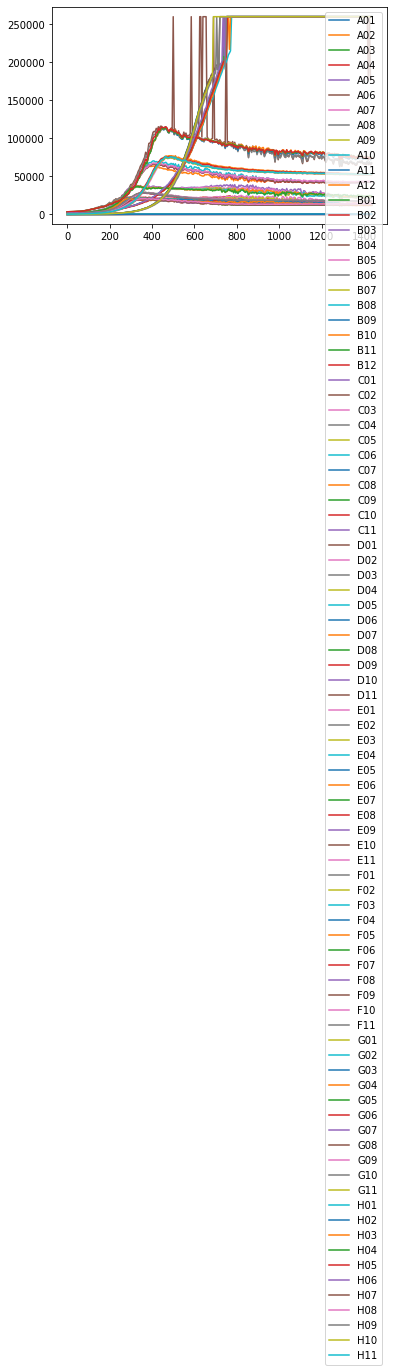

In [51]:
FI_gain1000_df.plot()

In [82]:
run_replicate_wells
#plate_decryption_df.loc[plate_decryption_df.samples_id==unique_sample].index
plate_decryption_df['host'].unique()
data_by_host_dict['DE344'].loc[data_by_host_dict['DE344'].sample==unique_sample].index
#sample_id

KeyError: 'False: boolean label can not be used without a boolean index'

DE344|just_cells Index(['G01', 'H01', 'A02', 'B02', 'C02', 'D02'], dtype='object')
DE344|pJUMP47-2A(pSC101) Index(['C03', 'D03', 'E03', 'F03', 'G03', 'H03'], dtype='object')
DE344|pJUMP43-2A(pBBR1) Index(['A04', 'B04', 'C04', 'D04', 'E04', 'F04'], dtype='object')
DE344|pJUMP46-2A(p15A) Index(['G04', 'H04', 'A05', 'B05', 'C05', 'D05'], dtype='object')
DE344|pJUMP49-2A(pBBR322-ROP) Index(['E05', 'F05', 'G05', 'H05', 'A06', 'B06'], dtype='object')
DE344|pJUMP44-2A(pRO1600-ColE1) Index(['C06', 'D06', 'E06', 'F06', 'G06', 'H06'], dtype='object')
DE344|pJUMP48-2A(pUC) Index(['A07', 'B07', 'C07', 'D07', 'E07', 'F07'], dtype='object')
DH5a|just_cells Index(['E02', 'F02', 'G02', 'H02', 'A03', 'B03'], dtype='object')
DH5a|pJUMP47-2A(pSC101) Index(['G07', 'H07', 'A08', 'B08', 'C08', 'D08'], dtype='object')
DH5a|pJUMP43-2A(pBBR1) Index(['E08', 'F08', 'G08', 'H08', 'A09', 'B09'], dtype='object')
DH5a|pJUMP46-2A(p15A) Index(['C09', 'D09', 'E09', 'F09', 'G09', 'H09'], dtype='object')
DH5a|pJUMP49-2A(

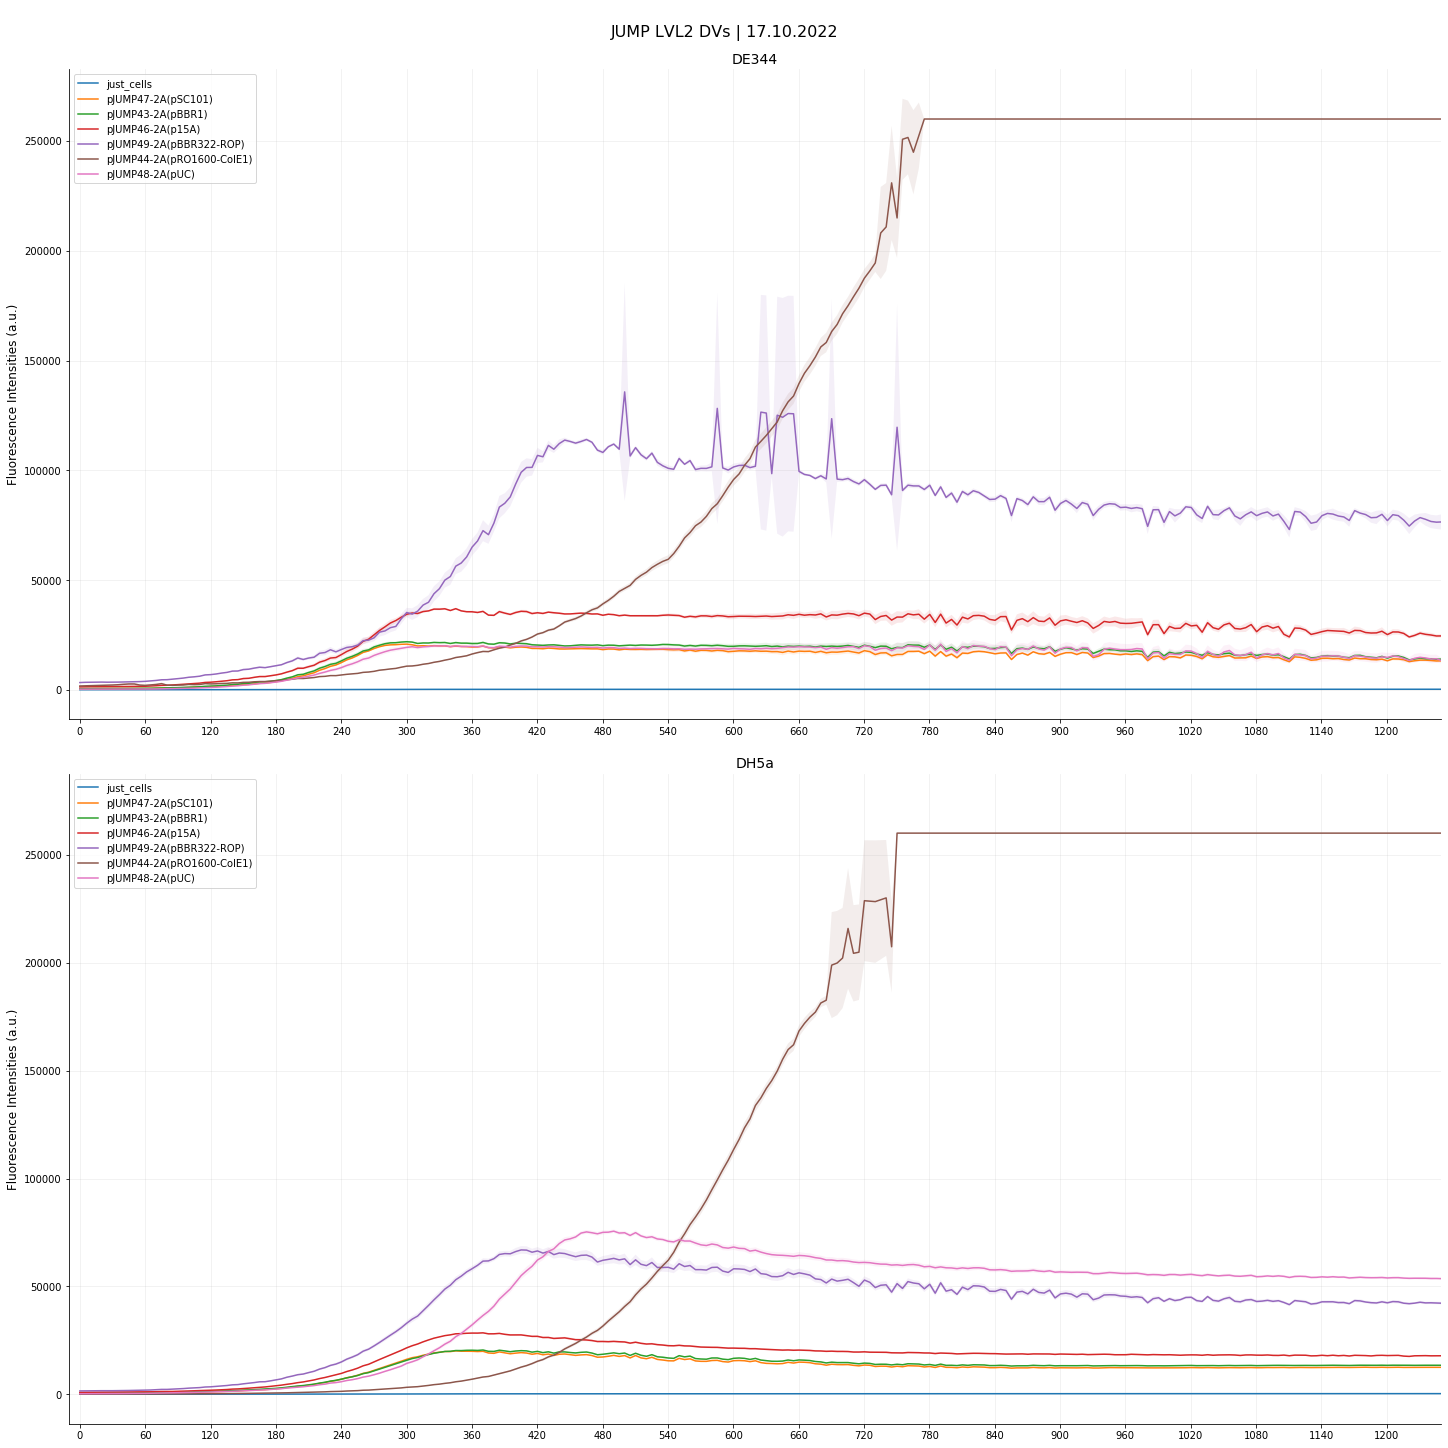

In [83]:
fig = plt.figure(figsize=(20,20), constrained_layout=True)
gs = gridspec.GridSpec(len(data_by_host_dict.keys())-1,1, figure=fig)
plt.suptitle(f"\nJUMP LVL2 DVs | 17.10.2022",size=16)
plot_row = 0

test_df = FI_gain1000_df #FI_gain1000_df | OD600_df
# loop 1 - through samples
for sample_idx, sample_id in enumerate(plate_decryption_df['host'].unique()[1:]):
    ax1= fig.add_subplot(gs[plot_row,0])
    # plot negative controls -------------------------------------------------------
#     for unique_sample in plate_decryption_df.loc[(plate_decryption_df.samples=='NC')].samples_id.unique():
#         run_replicate_wells = plate_decryption_df.loc[plate_decryption_df.host==unique_sample].index
#         current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
#         x= test_df[run_replicate_wells].index
#         y= test_df[run_replicate_wells].mean(axis=1)
#         variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
#         # 1- average line plot
#         sns.lineplot(ax = ax1,
#                      data = y, label=f"{current_sample_name}",color='yellow') # 1.95 * np.std(y)/np.sqrt(len(x))
#         # 2- confidence interval
#         ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
#         ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color='grey')
    # plot negative controls -------------------------------------------------------
    # plot negative controls -------------------------------------------------------
#     for unique_sample in plate_decryption_df.loc[(plate_decryption_df.samples=='just_cells')].samples_id.unique():
#         run_replicate_wells = plate_decryption_df.loc[plate_decryption_df.samples_id==unique_sample].index
#         current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
#         x= test_df[run_replicate_wells].index
#         y= test_df[run_replicate_wells].mean(axis=1)
#         variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
#         # 1- average line plot
#         sns.lineplot(ax = ax1,
#                      data = y, label=f"{current_sample_name}",color='dimgray') # 1.95 * np.std(y)/np.sqrt(len(x))
#         # 2- confidence interval
#         ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
#         ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color='dimgray')
    # plot negative controls -------------------------------------------------------
    # loop 2 - through replicates
    for unique_sample in data_by_host_dict[sample_id].samples_id.unique():
        run_replicate_wells = data_by_host_dict[sample_id].loc[data_by_host_dict[sample_id].samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
    #for run_replicate_wells in divide_chunks( data_by_sample_dict[sample_id].index, 3 ):
        print(unique_sample,run_replicate_wells)
        replicate_no = 3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name.split('|')[1]}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)
#         ax1.set_title(f"Growth Curves - {sample_id}",size=14)
#         ax1.set_ylabel("$OD_{600}$",size=12)
        #ax1.set_ylim([0.3,2.8])
        ax1.set_title(f"{sample_id}",size=14)
        ax1.set_ylabel("Fluorescence Intensities (a.u.)",size=12)
        #ax1.set_ylim([0.1,45_000])
        if sample_id == plate_decryption_df['samples_id'].unique()[2:][-1]:
            ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)
    
    plot_row+=1

#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_growth_curves.png", dpi=300)
#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_mVenus_gain2000.png", dpi=300)

In [55]:
data_by_media_dict['EZRDM'].index
FI_gain1000_df

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,H02,H03,H04,H05,H06,H07,H08,H09,H10,H11
0.000000,95,95,96,604,1386,3310,361,592,641,1655,...,96,575,1509,3436,1640,563,657,986,153,311
5.000000,93,100,92,633,1450,3405,359,577,651,1677,...,94,608,1560,3531,1768,576,671,1014,144,307
10.000000,87,93,92,639,1495,3464,359,586,662,1710,...,89,620,1592,3548,1843,579,662,1042,154,321
15.000000,83,93,85,626,1513,3441,348,595,659,1718,...,90,616,1587,3618,1989,577,673,1019,144,326
20.016667,88,86,86,624,1554,3465,355,587,672,1736,...,92,616,1610,3653,2036,587,676,1048,151,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415.700000,84,326,370,13393,23441,69495,12822,12421,13142,42962,...,383,12153,24665,75393,260000,13149,13790,17935,260000,52866
1420.716667,84,324,365,12586,21810,65374,12686,12385,13132,42762,...,375,11867,24131,73140,260000,12773,13811,17370,260000,52962
1425.716667,87,310,377,12970,22873,68645,12761,12425,13119,42971,...,379,12082,24779,75087,260000,12979,14234,17586,260000,52942
1430.716667,84,315,376,12614,21795,65235,12711,12399,13150,42778,...,373,11923,24546,73511,260000,12840,13861,17274,260000,52903


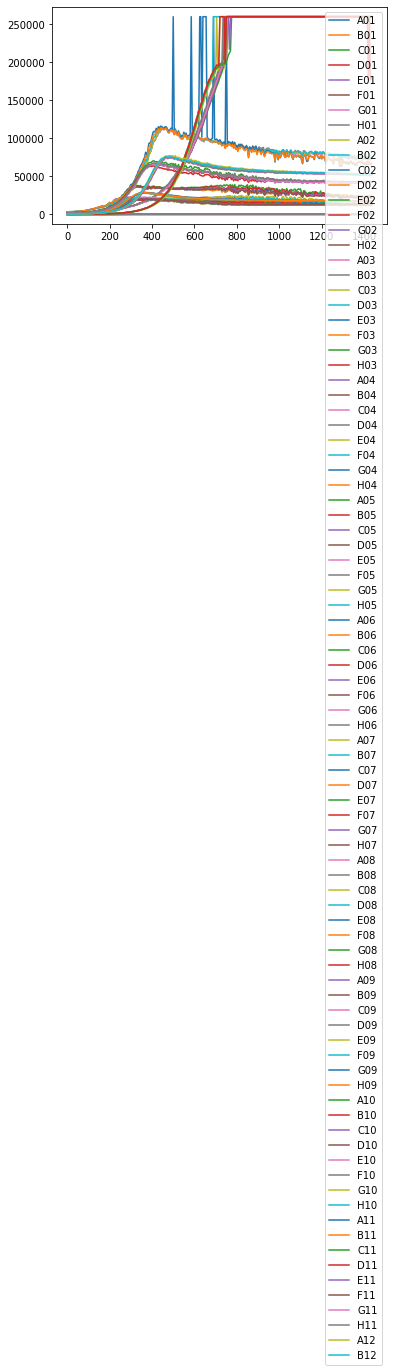

In [56]:
FI_gain1000_df[ data_by_media_dict['EZRDM'].index ].plot()

In [16]:
data_by_media_dict['EZRDM'].loc[data_by_media_dict['EZRDM'].samples=='just_cells']

,cells,host,samples,media,abx_c,replicate,sample_ID,media_ID,ID,media_source,sample_source,destination,prep_date,samples_id
G01,y,DE344,just_cells,EZRDM,0ug,0,DE344|just_cells,EZRDM|0ug,DE344|just_cells|EZRDM|0ug|0,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,G1 of 3 on Temperature Module GEN2 on 3,2022-10-20,DE344|just_cells
H01,y,DE344,just_cells,EZRDM,0ug,1,DE344|just_cells,EZRDM|0ug,DE344|just_cells|EZRDM|0ug|1,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,H1 of 3 on Temperature Module GEN2 on 3,2022-10-20,DE344|just_cells
A02,y,DE344,just_cells,EZRDM,0ug,2,DE344|just_cells,EZRDM|0ug,DE344|just_cells|EZRDM|0ug|2,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,A2 of 3 on Temperature Module GEN2 on 3,2022-10-20,DE344|just_cells
B02,y,DE344,just_cells,EZRDM,0ug,3,DE344|just_cells,EZRDM|0ug,DE344|just_cells|EZRDM|0ug|3,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,B2 of 3 on Temperature Module GEN2 on 3,2022-10-20,DE344|just_cells
C02,y,DE344,just_cells,EZRDM,0ug,4,DE344|just_cells,EZRDM|0ug,DE344|just_cells|EZRDM|0ug|4,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,C2 of 3 on Temperature Module GEN2 on 3,2022-10-20,DE344|just_cells
D02,y,DE344,just_cells,EZRDM,0ug,5,DE344|just_cells,EZRDM|0ug,DE344|just_cells|EZRDM|0ug|5,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,B1 of Opentrons 96 Well Aluminum Block with Ge...,D2 of 3 on Temperature Module GEN2 on 3,2022-10-20,DE344|just_cells
E02,y,DH5a,just_cells,EZRDM,0ug,0,DH5a|just_cells,EZRDM|0ug,DH5a|just_cells|EZRDM|0ug|0,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,C1 of Opentrons 96 Well Aluminum Block with Ge...,E2 of 3 on Temperature Module GEN2 on 3,2022-10-20,DH5a|just_cells
F02,y,DH5a,just_cells,EZRDM,0ug,1,DH5a|just_cells,EZRDM|0ug,DH5a|just_cells|EZRDM|0ug|1,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,C1 of Opentrons 96 Well Aluminum Block with Ge...,F2 of 3 on Temperature Module GEN2 on 3,2022-10-20,DH5a|just_cells
G02,y,DH5a,just_cells,EZRDM,0ug,2,DH5a|just_cells,EZRDM|0ug,DH5a|just_cells|EZRDM|0ug|2,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,C1 of Opentrons 96 Well Aluminum Block with Ge...,G2 of 3 on Temperature Module GEN2 on 3,2022-10-20,DH5a|just_cells
H02,y,DH5a,just_cells,EZRDM,0ug,3,DH5a|just_cells,EZRDM|0ug,DH5a|just_cells|EZRDM|0ug|3,A1 of Opentrons 6 Tube Rack with Falcon 50 mL ...,C1 of Opentrons 96 Well Aluminum Block with Ge...,H2 of 3 on Temperature Module GEN2 on 3,2022-10-20,DH5a|just_cells


In [17]:
data_by_media_dict['EZRDM'].samples.unique()

array(['NC', 'just_cells', 'pJUMP47-2A(pSC101)', 'pJUMP43-2A(pBBR1)',
       'pJUMP46-2A(p15A)', 'pJUMP49-2A(pBBR322-ROP)',
       'pJUMP44-2A(pRO1600-ColE1)', 'pJUMP48-2A(pUC)'], dtype=object)

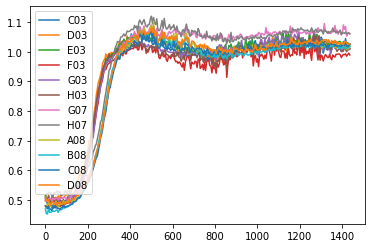

In [18]:
OD800_df[data_by_media_dict['EZRDM'].loc[data_by_media_dict['EZRDM'].samples=='pJUMP47-2A(pSC101)'].index].plot()

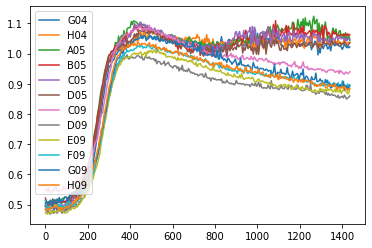

In [19]:
OD800_df[data_by_media_dict['EZRDM'].loc[data_by_media_dict['EZRDM'].samples=='pJUMP46-2A(p15A)'].index].plot()

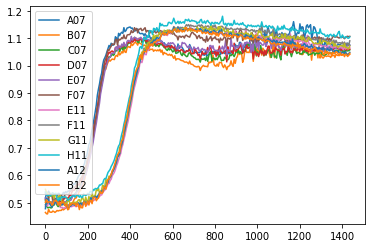

In [20]:
OD800_df[data_by_media_dict['EZRDM'].loc[data_by_media_dict['EZRDM'].samples=='pJUMP48-2A(pUC)'].index].plot()

KeyError: 'DH5a|pJUMP48-2A(pUC)'

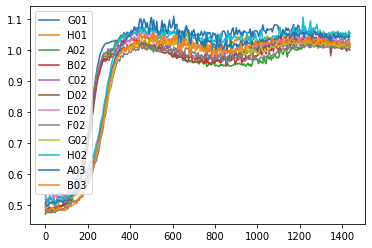

In [21]:
OD800_df[data_by_media_dict['EZRDM'].loc[data_by_media_dict['EZRDM'].samples=='just_cells'].index].plot()
plate_decryption_df['media'].unique()
data_by_media_dict[sample_id].samples_id.unique()

In [ ]:
fig = plt.figure(figsize=(18,12), constrained_layout=True)
gs = gridspec.GridSpec(len(data_by_media_dict.keys()),1, figure=fig)
plt.suptitle(f"\nJUMP LVL2 DVs | 17.10.2022",size=16)
plot_row = 0

test_df = FI_gain850_df #FI_gain850_df | OD800_df
# loop 1 - through samples
for sample_idx, sample_id in enumerate(plate_decryption_df['media'].unique()[:]):
    ax1= fig.add_subplot(gs[plot_row,0])
    # plot negative controls -------------------------------------------------------
    for unique_sample in plate_decryption_df.loc[(plate_decryption_df.samples=='NC')].samples_id.unique():
        run_replicate_wells = plate_decryption_df.loc[plate_decryption_df.samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'ID']
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name}")#,color='orange') # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color='grey')
    # plot negative controls -------------------------------------------------------
    # plot negative controls -------------------------------------------------------
#     for unique_sample in plate_decryption_df.loc[(plate_decryption_df.samples=='just_cells')].samples_id.unique():
#         run_replicate_wells = plate_decryption_df.loc[plate_decryption_df.samples_id==unique_sample].index
#         current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
#         x= test_df[run_replicate_wells].index
#         y= test_df[run_replicate_wells].mean(axis=1)
#         variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
#         # 1- average line plot
#         sns.lineplot(ax = ax1,
#                      data = y, label=f"{current_sample_name}",color='dimgray') # 1.95 * np.std(y)/np.sqrt(len(x))
#         # 2- confidence interval
#         ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
#         ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color='dimgray')
    # plot negative controls -------------------------------------------------------
    # loop 2 - through replicates
    for unique_sample in data_by_media_dict[sample_id].samples_id.unique()[1:]:
        run_replicate_wells = data_by_media_dict[sample_id].loc[data_by_media_dict[sample_id].samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples']
    #for run_replicate_wells in divide_chunks( data_by_sample_dict[sample_id].index, 3 ):
        replicate_no = len(run_replicate_wells)
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{current_sample_name}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)
        # ----------------------------------------------------------------------
        ax1.set_title(f"Growth Curves - {sample_id}",size=14)
        ax1.set_ylabel("$OD_{600}$",size=12)
        # ----------------------------------------------------------------------
#         ax1.set_ylim([0.3,2.8])
#         ax1.set_title(f"{sample_id}",size=14)
#         ax1.set_ylabel("Fluorescence Intensities (a.u.)",size=12)
        # ----------------------------------------------------------------------
        #ax1.set_ylim([0.1,45_000])
        if sample_id == plate_decryption_df['samples_id'].unique()[2:][-1]:
            ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_xlim([-10,1440])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)
    
    plot_row+=1

#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_growth_curves.png", dpi=300)
#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_mVenus_gain2000.png", dpi=300)

In [ ]:
run_replicate_wells

In [ ]:
plate_decryption_df.T[['F03', 'G03', 'H03']].T
x
current_sample_name

## Hill Plots

In [ ]:
from scipy.optimize import curve_fit
import sympy as sy

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# def func(x, a, b, c): # Hill sigmoidal equation from zunzun.com
#     return  a * np.power(x, b) / (np.power(c, b) + np.power(x, b))

def sigmoid_function(xdata, x0, k):
    y = np.exp(-k*(xdata-x0)) / (1 + np.exp(-k*(xdata-x0)))
    return y

# def sigmoid_derivative(x, x0, k):
#     f = np.exp(-k*(x-x0))
#     return -k / f

In [ ]:
color_list = sns.color_palette("tab10",len(plate_decryption_df.samples_id.unique()))
color_list_two = sns.color_palette("tab10",len(plate_decryption_df.samples_id.unique())+1)

In [ ]:
plate_decryption_df['samples'].unique()[3:-1][-1]

In [ ]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)
gs = gridspec.GridSpec(len(data_by_sample_dict.keys())-4,1, figure=fig)
plt.suptitle(f"\nCambridge iGEM22 | P_BAD Characterisation Test3 | Hill Plots | 03.10.2022",size=16)
plot_row = 0

test_df = FI_gain2000_df #FI_gain2000_df | OD600_df
summary_data = []
# loop 1 - through samples
for sample_idx, sample_id in enumerate(plate_decryption_df['samples'].unique()[3:-1]):
    ax1= fig.add_subplot(gs[plot_row,0])
    samples_list, growth_rate_dt_list, std_growth_rate_list = [], [], []
    midpoint_list, max_expression_l = [], []
    popt_list = []
    # plot negative controls -------------------------------------------------------
    # loop 2 - through replicates
    for idx, unique_sample in enumerate(data_by_sample_dict[sample_id].samples_id.unique()):
        run_replicate_wells = data_by_sample_dict[sample_id].loc[data_by_sample_dict[sample_id].samples_id==unique_sample].index
        current_sample_name = plate_decryption_df.loc[run_replicate_wells[0],'samples_id']
    #for run_replicate_wells in divide_chunks( data_by_sample_dict[sample_id].index, 3 ):
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1, data = y,color=color_list[idx])#, label=f"{current_sample_name}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/len(run_replicate_wells) ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1,color=color_list[idx],)
        
        # curve fit (excluding medium negative control)
    #if idx!=0:
        p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
        popt, pcov = curve_fit(sigmoid, x, y, p0)#, method='lm')
        # save fitted curve stats
        samples_list.append(current_sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
        midpoint_list.append(popt[1]), max_expression_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
        popt_list.append(popt)
        plt.plot(x, sigmoid(x, *popt), label=f"{current_sample_name.split('|')[1]} - max:{int(popt[0]+popt[3])}",color=color_list_two[idx],)# - $t_{'D'}$={round(np.log(2)/popt[2],1)}min")#, color=color_list_two[idx])

#         ax1.set_title(f"Growth Curves - {sample_id}",size=14)
#         ax1.set_ylabel("$OD_{600}$",size=12)
#         ax1.set_ylim([0.3,1.8])
        ax1.set_title(f"mVenus - {sample_id}",size=14)
        ax1.set_ylabel("Fluorescence Intensities (a.u.)",size=12)
        ax1.set_ylim([0.1,30_000])
        if sample_id == plate_decryption_df['samples'].unique()[3:-1][-1]:
            ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)
        plt.legend()
    
    plot_row+=1
    summary_data.append([samples_list, growth_rate_dt_list, std_growth_rate_list, midpoint_list, max_expression_l])

#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_growth_curves.png", dpi=300)
#plt.savefig("221003_iGEM22_PBADcharact_test3_Hills_mVenus_gain2000.png", dpi=300)

In [ ]:
FI_gain2000_df[plate_decryption_df.loc[plate_decryption_df.samples=='PB10'].index].plot()

In [ ]:
PB10_data = pd.DataFrame(summary_data[1]).T
PB10_data.columns = ['constructs','dt_gr','std_dt_gr','midpoint','max_expression']
PB10_data['inducer_c'] = PB10_data.constructs.apply(lambda x: int(x.split('|')[1].split('uM')[0]))

In [ ]:
PB10_data#.loc[3,'max_expression'] = 11225.544003750421

In [ ]:
#np.log10(PB10_data.max_expression)
[np.log(x) for x in PB10_data.max_expression]

In [ ]:
plt.plot(np.log(PB10_data.inducer_c), [np.log(x) for x in PB10_data.max_expression])

In [ ]:
p0 = [max(PB10_data.max_expression), np.median(PB10_data.inducer_c),1,min(PB10_data.max_expression)] # this is an mandatory initial guess
popt, pcov = curve_fit(sigmoid, PB10_data.inducer_c, PB10_data.max_expression, p0)#, method='lm')
# save fitted curve stats
# samples_list.append(current_sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
# midpoint_list.append(popt[1]), max_expression_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
# popt_list.append(popt)
plt.plot(PB10_data.inducer_c, sigmoid(PB10_data.inducer_c, *popt), label=f"{current_sample_name} - IP:{round(popt[1],1)}min",color=color_list_two[idx],)# - $t_{'D'}$={round(np.log(2)/popt[2],1)}min")#, color=color_list_two[idx])


In [ ]:
[x for x in popt]

In [ ]:
renaming_dict = dict(zip(plate_decryption_df.name.unique(), ['empty NC','DH5⍺ NC','LVL1 NC', 'pSC101', 'pBBR1', 'pUC']))
renaming_dict

In [ ]:
fig = plt.figure(figsize=(12,8), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
plt.suptitle(f"\nCambridge 22 | JUMP LVL1 DV Characterisation | 06.09.2022",size=16)
ax1= fig.add_subplot(gs[0,0])

test_df = OD600_df
samples_list, growth_rate_dt_list, std_growth_rate_list = [], [], []
midpoint_list, carrying_capacity_l = [], []
popt_list = []

replicate_no = 3
conc = 0
for idx, run_replicate_wells in enumerate(divide_chunks( data_by_am_c_dict[conc].index, replicate_no )[:]):
    xdata= test_df[run_replicate_wells].index
    ydata= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    xdata_fit = ydata[:ydata.idxmax()].index
    ydata_fit = ydata[:ydata.idxmax()]
    sample_name = renaming_dict[plate_decryption_df.loc[run_replicate_wells[0],'name']]
    # 1- average line plot
    if idx==0:
        sns.lineplot(ax = ax1,
                     data = ydata, color=color_list[idx], label=f"{sample_name}") # 1.95 * np.std(y)/np.sqrt(len(x))
    else:
        sns.lineplot(ax = ax1,
                     data = ydata, color=color_list[idx])
    # 2- confidence interval
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
    ax1.fill_between(xdata, (ydata-ci), (ydata+ci), alpha=.1, color=color_list[idx])
    # curve fit (excluding medium negative control)
    if idx!=0:
        p0 = [max(ydata_fit), np.median(xdata_fit),1,min(ydata_fit)] # this is an mandatory initial guess
        popt, pcov = curve_fit(sigmoid, xdata_fit, ydata_fit, p0)#, method='lm')
        # save fitted curve stats
        samples_list.append(sample_name), growth_rate_dt_list.append(popt[2]), std_growth_rate_list.append(np.sqrt(np.diag(pcov))[2])
        midpoint_list.append(popt[1]), carrying_capacity_l.append(popt[0]+popt[2])#,  initial_guess = [popt[1], 1]  
        popt_list.append(popt)
        plt.plot(xdata, sigmoid(xdata, *popt), label=f"{sample_name} - IP:{round(popt[1],1)}min - $t_{'D'}$={round(np.log(2)/popt[2],1)}min", color=color_list_two[idx])

    ax1.set_title(f"Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
    ax1.set_ylabel("$OD_{600}$",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    plt.xticks(np.arange(min(x), max(x)+60, 60.0))
    #ax1.set_ylim([0.1,2.6])
    ax1.set_xlim([-10,1250])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    plt.grid(True,alpha=0.2)
    plt.legend()
    plt.savefig(f"220906_iGEM22_sfGFPcharact_test1_ammconc0_curve_fits.png", dpi=300)

In [ ]:
# save as DataFrame
summary_stats = pd.DataFrame([samples_list, growth_rate_dt_list, std_growth_rate_list, midpoint_list, carrying_capacity_l])
summary_stats = summary_stats.T
summary_stats.columns = ['constructs','dt_gr','std_dt_gr','midpoint','carrying_capacity']
# convert to doubling times
summary_stats['dt'] = summary_stats.dt_gr.apply(lambda x: np.log(2)/x)
summary_stats['dt_upper'] = (summary_stats.dt_gr + summary_stats.std_dt_gr).apply(lambda x: np.log(2)/x)
summary_stats['dt_lower'] = (summary_stats.dt_gr - summary_stats.std_dt_gr).apply(lambda x: np.log(2)/x)

In [ ]:
xdata[:int(ydata.idxmax())], ydata[:ydata.idxmax()]
xdata[len(ydata[:ydata.idxmax()])]
#xdata[ydata.idxmax()]
ydata[:ydata.idxmax()].index

In [ ]:
summary_stats#.to_csv('220906_iGEM22_sfGFPcharact_test1_ammconc0_summary_stats.csv')

In [ ]:
[np.log(2)/x[2] for x in popt_list]

## Plotting sfGFP Intensities

In [ ]:
fig = plt.figure(figsize=(14,24), constrained_layout=True)
gs = gridspec.GridSpec(6,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df = FI_gain800_df
for conc in plate_decryption_df['[NH4]2SO4_c_mM'].unique():
    ax1= fig.add_subplot(gs[plot_row,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no=3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        if plate_decryption_df.loc[run_replicate_wells[0],'name'] !='none':
            sns.lineplot(ax = ax1,
                         data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'plasmid']}")
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no) # 1.95 * np.std(y)/np.sqrt(len(x))
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"sfGFP Intensities at {conc} mM [NH4]2SO4",size=14)
        ax1.set_ylabel("sfGFP (a.u.)",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+1, 60.0))
        ax1.set_ylim([0,38_000])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)

    plot_row+=1
#plt.savefig("220906_iGEM22_sfGFPcharact_test1_amm_conc_FIs_gain800.png", dpi=300)

In [ ]:
fig = plt.figure(figsize=(14,10), constrained_layout=True)
gs = gridspec.GridSpec(1,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df=OD600_df

ax1= fig.add_subplot(gs[0,0])
for run_replicate_wells in divide_chunks( plate_decryption_df.index, 3 ):
    replicate_no=3
    x= test_df[run_replicate_wells].index
    y= test_df[run_replicate_wells].mean(axis=1)
    variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
    # 1- average line plot
    sns.lineplot(ax = ax1,
                 data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'plasmid']}")
    # 2- confidence interval
#     ci = 1.95 * np.std(y)/np.sqrt(len(x))
#     ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)
    ci = 2 * np.sqrt( variance_per_timepoint/replicate_no) # 1.95 * np.std(y)/np.sqrt(len(x))
    ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

    ax1.set_title(f"Cell Growth at {conc} mM [NH4]2SO4",size=14)
    ax1.set_ylabel(f"OD600",size=12)
    ax1.set_xlabel(f"time (min)",size=12)
    


## ANOVA Analysis - OD600

In [ ]:
means_zero_amm = {}
var_zero_amm = {}
for run_replicate_wells in divide_chunks( data_by_am_c_dict[0].index, 3 )[1:]:
    exemplary_well_name = run_replicate_wells[0]
    means_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(1).mean().mean(axis=1)
    var_zero_amm[data_by_am_c_dict[0].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[0].index][run_replicate_wells].rolling(1).mean().var(axis=1)
means_zero_amm_df = pd.DataFrame(means_zero_amm)
var_zero_amm_df = pd.DataFrame(var_zero_amm)
var_pooled = var_zero_amm_df.mean(axis=1)
var_of_means = means_zero_amm_df.var(axis=1)
F_over_time = (3*var_of_means)/var_pooled

In [ ]:
means_zero_amm_df.plot()

In [ ]:
fig = plt.figure(figsize=(14,10), constrained_layout=True)
gs = gridspec.GridSpec(2,1, figure=fig)
plt.suptitle(f"")
plot_row = 0

test_df = OD600_df
for conc in [plate_decryption_df['[NH4]2SO4_c_mM'].unique()[0]]:
    ax1= fig.add_subplot(gs[0,0])
    
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
        replicate_no = 3
        x= test_df[run_replicate_wells].index
        y= test_df[run_replicate_wells].mean(axis=1)
        variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
        # 1- average line plot
        sns.lineplot(ax = ax1,
                     data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}") # 1.95 * np.std(y)/np.sqrt(len(x))
        # 2- confidence interval
        ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
        ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

        ax1.set_title(f"Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
        ax1.set_ylabel("$OD_{600}$",size=12)
        ax1.set_xlabel(f"time (min)",size=12)
        plt.xticks(np.arange(min(x), max(x)+60, 60.0))
        ax1.set_ylim([0.1,2.2])
        ax1.set_xlim([-10,1250])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        plt.grid(True,alpha=0.2)

ax2= fig.add_subplot(gs[1,0]) 
sns.lineplot(ax = ax2,
                     data = F_over_time)#, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}")

ax2.set_title(f"F-Test Over Time (no cells excluded)",size=14)
ax2.set_ylabel("F value",size=12)
ax1.set_xlabel(f"time (min)",size=12)
plt.xticks(np.arange(min(x), max(x)+60, 60.0))
#ax2.set_ylim([0.1,2.2])
ax2.set_xlim([-10,1250])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.grid(True,alpha=0.2)
#plt.savefig("220906_iGEM22_sfGFPcharact_test1_amm_conc_growth_curves.png", dpi=300)

In [ ]:
plate_decryption_df['[NH4]2SO4_c_mM'].unique()[1]

In [ ]:
@interact
def show_moving_average (window_x=(1,10)):
    
    # ANPVA
    means_zero_amm = {}
    var_zero_amm = {}
    sample_names = []
    concentration_investigated = 1000
    for run_replicate_wells in divide_chunks( data_by_am_c_dict[concentration_investigated].index, 3 )[1:]:
        exemplary_well_name = run_replicate_wells[0]
        sample_names.append(data_by_am_c_dict[concentration_investigated].loc[exemplary_well_name].plasmid)
        means_zero_amm[data_by_am_c_dict[concentration_investigated].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[concentration_investigated].index][run_replicate_wells].rolling(window_x).mean().mean(axis=1)
        var_zero_amm[data_by_am_c_dict[concentration_investigated].loc[exemplary_well_name].plasmid] = OD600_df[data_by_am_c_dict[concentration_investigated].index][run_replicate_wells].rolling(window_x).mean().var(axis=1)
    means_zero_amm_df = pd.DataFrame(means_zero_amm)
    var_zero_amm_df = pd.DataFrame(var_zero_amm)
    var_pooled = var_zero_amm_df.mean(axis=1)
    var_of_means = means_zero_amm_df.var(axis=1)
    F_over_time = (3*var_of_means)/var_pooled
    
    fig = plt.figure(figsize=(14,10), constrained_layout=True)
    gs = gridspec.GridSpec(2,1, figure=fig)
    plt.suptitle(f"\nCambridge iGEM22 JUMP LVL1 DV Characterisation Project | $[NH4]_{2}$$SO_{4}$ Factors | 06.09.2022",size=16)
    plot_row = 0
    
    test_df = OD600_df
    for conc in [concentration_investigated]:
        
        ax1= fig.add_subplot(gs[0,0])

        for run_replicate_wells in divide_chunks( data_by_am_c_dict[conc].index, 3 ):
            replicate_no = 3
            x= test_df[run_replicate_wells].index
            y= test_df[run_replicate_wells].mean(axis=1)
            variance_per_timepoint = test_df[run_replicate_wells].var(axis=1)
            # 1- average line plot
            sns.lineplot(ax = ax1,
                         data = y, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}") # 1.95 * np.std(y)/np.sqrt(len(x))
            # 2- confidence interval
            ci = 2 * np.sqrt( variance_per_timepoint/replicate_no ) 
            ax1.fill_between(x, (y-ci), (y+ci), alpha=.1)

            ax1.set_title(f" Cell Growth at {conc} mM $[NH4]_{2}$$SO_{4}$",size=14)
            ax1.set_ylabel("$OD_{600}$",size=12)
            ax1.set_xlabel(f"time (min)",size=12)
            plt.xticks(np.arange(min(x), max(x)+60, 60.0))
            ax1.set_ylim([0.1,2.2])
            ax1.set_xlim([-10,1250])
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            plt.grid(True,alpha=0.2)

    ax2= fig.add_subplot(gs[1,0]) 
    sns.lineplot(ax = ax2,
                 data = F_over_time)#, label=f"{plate_decryption_df.loc[run_replicate_wells[0],'name']}")
    critical_value=11.283
    ax2.fill_between(x, (F_over_time), critical_value, alpha=.6, color='coral',where=F_over_time>critical_value)
    
    ax2.set_title(f"F-Test Timeseries ('no cells' excluded) - rolling average {window_x*5} min {['DH5⍺ alone','LVL1 neg. control']+sample_names[2:]}",size=14)
    ax2.set_ylabel("F value",size=12)
    ax2.set_xlabel(f"time (min)",size=12)
    plt.xticks(np.arange(min(x), max(x)+60, 60.0))
    ax2.set_ylim([-2.1,75.])
    ax2.set_xlim([-10,1250])
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    plt.grid(True,alpha=0.2)
    plt.hlines(11.283,0,12_000,color='red',linestyle='--')
    plt.text(950, 14, 'Critical F value for 0.1% = 11.283\n(5 samples & 3 replicates)', fontsize = 12, 
         bbox = dict(facecolor = 'white', edgecolor='white',alpha = 0.5),color='red')
    plt.savefig(f"220906_iGEM22_sfGFPcharact_test1_ammconc{concentration_investigated}_Fvalue_averages_{window_x*5}min.pdf", dpi=300)
    plt.show()

In [ ]:
F_over_time[]